<a href="https://colab.research.google.com/github/Nguyen-Phuong-Anh/digit_recognition/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Load and preprocess the dataset
dataset = pd.read_csv('train.csv')
dataset = np.array(dataset)
num_examples, num_features = dataset.shape
np.random.shuffle(dataset)

# Split the dataset into dev and train sets
dev_data = dataset[0:1000].T
dev_labels = dev_data[0]
dev_features = dev_data[1:num_features]
dev_features = dev_features / 255.

train_data = dataset[1000:num_examples].T
train_labels = train_data[0]
train_features = train_data[1:num_features]
train_features = train_features / 255.
_,num_train_examples = train_features.shape

In [ ]:
# Define the Neural Network class
class NeuralNetwork:
    def __init__(self, train_features, train_labels):
        self.train_features = train_features
        self.train_labels = train_labels
        self.W1, self.b1, self.W2, self.b2 = self.initialize_parameters()

    # Initialize parameters
    def initialize_parameters(self):
        W1 = np.random.rand(10, 784) - 0.5
        b1 = np.random.rand(10, 1) - 0.5
        W2 = np.random.rand(10, 10) - 0.5
        b2 = np.random.rand(10, 1) - 0.5
        return W1, b1, W2, b2

    # Define activation functions and their derivatives
    def sigmoid_activation(self, Z):
        return 1 / (1 + np.exp(-Z))

    def sigmoid_derivative(self, Z):
        s = self.sigmoid_activation(Z)
        return s * (1 - s)

    def softmax_activation(self, Z):
        A = np.exp(Z) / sum(np.exp(Z))
        return A

    # Forward propagation
    def forward_propagation(self, X):
        Z1 = self.W1.dot(X) + self.b1
        A1 = self.sigmoid_activation(Z1)
        Z2 = self.W2.dot(A1) + self.b2
        A2 = self.softmax_activation(Z2)
        return Z1, A1, Z2, A2

    # One-hot encoding for labels
    def one_hot_encoding(self, Y):
        Y = Y.astype(int)  # convert Y to integer type
        one_hot_Y = np.zeros((Y.size, int(Y.max()) + 1))
        one_hot_Y[np.arange(Y.size), Y] = 1
        one_hot_Y = one_hot_Y.T
        return one_hot_Y

    # Backward propagation
    def backward_propagation(self, Z1, A1, Z2, A2, X, Y):
        m = Y.size  # add this line to define m
        one_hot_Y = self.one_hot_encoding(Y)
        dZ2 = A2 - one_hot_Y
        dW2 = 1 / m * dZ2.dot(A1.T)
        db2 = 1 / m * np.sum(dZ2)
        dZ1 = self.W2.T.dot(dZ2) * self.sigmoid_derivative(Z1)
        dW1 = 1 / m * dZ1.dot(X.T)
        db1 = 1 / m * np.sum(dZ1)
        return dW1, db1, dW2, db2

    # Update parameters
    def update_parameters(self, dW1, db1, dW2, db2, alpha):
        self.W1 = self.W1 - alpha * dW1
        self.b1 = self.b1 - alpha * db1
        self.W2 = self.W2 - alpha * dW2
        self.b2 = self.b2 - alpha * db2

    # Make predictions
    def predict(self, A2):
        return np.argmax(A2, 0)

    # Compute accuracy
    def compute_accuracy(self, predictions, Y):
        print(predictions, Y)
        return np.sum(predictions == Y) / Y.size

    # Train the model
    def train(self, alpha, iterations):
        for i in range(iterations):
            Z1, A1, Z2, A2 = self.forward_propagation(self.train_features)
            dW1, db1, dW2, db2 = self.backward_propagation(Z1, A1, Z2, A2, self.train_features, self.train_labels)
            self.update_parameters(dW1, db1, dW2, db2, alpha)
            if i % 10 == 0:
                print("Iteration: ", i)
                predictions = self.predict(A2)
                print(self.compute_accuracy(predictions, self.train_labels))

    # Make predictions
    def make_predictions(self, X):
        _, _, _, A2 = self.forward_propagation(X)
        predictions = self.predict(A2)
        return predictions

    # Test a prediction
    def test_prediction(self, index):
        current_image = self.train_features[:, index, None]
        prediction = self.make_predictions(self.train_features[:, index, None])
        label = self.train_labels[index]
        print("Prediction: ", prediction)
        print("Label: ", label)

        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()

In [ ]:
# Instantiate and train the model
nn = NeuralNetwork(train_features, train_labels)
nn.train(0.10, 500)

Iteration:  0
[2 2 2 ... 0 2 2] [1 0 8 ... 4 5 2]
0.12060975609756097
Iteration:  10
[2 2 2 ... 0 2 2] [1 0 8 ... 4 5 2]
0.13429268292682928
Iteration:  20
[2 4 2 ... 0 2 2] [1 0 8 ... 4 5 2]
0.14853658536585365
Iteration:  30
[2 4 2 ... 0 9 2] [1 0 8 ... 4 5 2]
0.16158536585365854
Iteration:  40
[2 4 2 ... 0 9 2] [1 0 8 ... 4 5 2]
0.17946341463414633
Iteration:  50
[2 4 2 ... 0 9 2] [1 0 8 ... 4 5 2]
0.19878048780487806
Iteration:  60
[2 4 2 ... 0 9 2] [1 0 8 ... 4 5 2]
0.22121951219512195
Iteration:  70
[2 0 1 ... 0 9 2] [1 0 8 ... 4 5 2]
0.25314634146341464
Iteration:  80
[2 0 1 ... 0 9 2] [1 0 8 ... 4 5 2]
0.28885365853658534
Iteration:  90
[2 0 1 ... 4 9 2] [1 0 8 ... 4 5 2]
0.32134146341463415
Iteration:  100
[2 0 1 ... 4 9 2] [1 0 8 ... 4 5 2]
0.35153658536585364
Iteration:  110
[2 0 1 ... 4 9 2] [1 0 8 ... 4 5 2]
0.3810487804878049
Iteration:  120
[1 0 1 ... 4 9 2] [1 0 8 ... 4 5 2]
0.4090731707317073
Iteration:  130
[1 0 1 ... 4 9 2] [1 0 8 ... 4 5 2]
0.43429268292682927
Itera

Prediction:  [1]
Label:  1


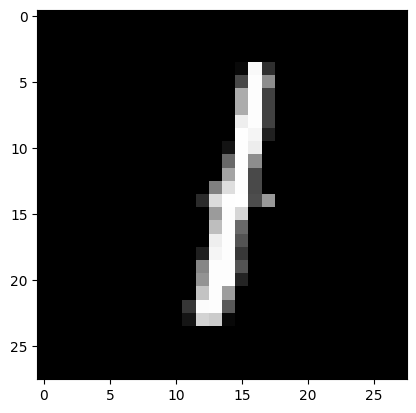

Prediction:  [0]
Label:  0


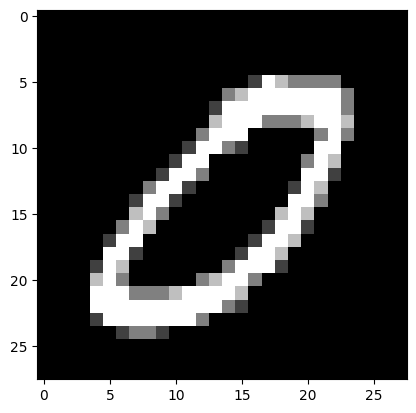

Prediction:  [8]
Label:  8


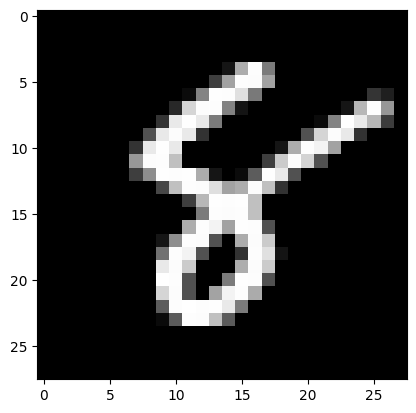

Prediction:  [8]
Label:  8


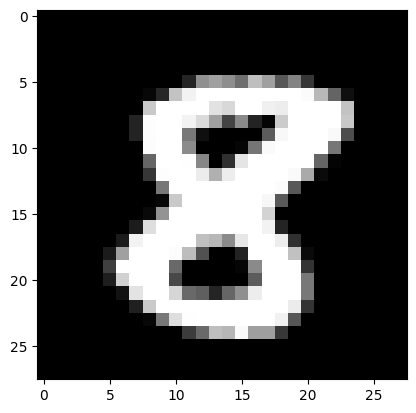

In [ ]:
# Test predictions
nn.test_prediction(0)
nn.test_prediction(1)
nn.test_prediction(2)
nn.test_prediction(3)

In [ ]:
# Make predictions on the dev set
dev_predictions = nn.make_predictions(dev_features)

# Compute accuracy on the dev set
dev_accuracy = nn.compute_accuracy(dev_predictions, dev_labels)
print("Dev set accuracy: ", dev_accuracy)

[0 3 2 1 9 1 0 3 0 4 8 1 9 7 6 8 3 3 1 9 8 6 0 4 1 0 9 9 2 0 1 9 6 1 0 1 3
 1 1 2 6 9 3 1 3 7 4 9 9 0 2 4 6 8 9 2 2 3 2 6 0 1 1 6 1 0 7 0 0 0 6 6 2 6
 3 0 1 2 0 3 7 4 3 7 9 7 1 1 6 7 8 9 9 9 1 3 6 2 9 0 7 7 2 0 0 1 2 4 7 7 7
 9 6 6 0 9 0 4 7 2 1 1 6 0 5 5 1 3 9 2 6 6 8 9 2 1 8 4 9 4 7 9 6 1 3 3 4 2
 2 7 4 6 4 6 9 9 1 0 1 7 4 9 7 9 0 9 1 8 9 3 0 9 1 0 1 9 7 7 3 2 4 7 3 0 0
 8 6 1 7 3 6 6 2 8 1 2 9 2 0 1 6 4 9 0 2 4 2 6 3 9 6 7 7 7 1 1 7 0 1 9 4 0
 3 3 8 7 1 4 0 9 1 1 0 1 9 6 8 9 3 3 1 4 0 0 3 6 2 8 4 2 9 9 4 6 6 0 0 6 9
 2 0 5 6 6 8 4 6 7 7 9 2 9 1 8 6 7 5 9 9 7 1 3 2 4 6 9 7 0 1 3 1 7 6 0 4 9
 2 7 4 8 6 1 6 3 4 7 6 9 2 3 9 4 7 7 0 2 2 1 3 9 4 9 4 9 9 3 8 1 5 1 0 1 5
 7 7 3 2 7 4 3 7 3 3 3 1 6 1 0 1 2 3 9 4 1 0 2 1 6 3 9 9 4 9 4 3 1 5 2 9 0
 3 0 6 3 6 4 2 3 1 0 4 6 8 0 7 3 6 1 8 1 1 9 1 4 6 0 6 1 0 7 0 4 1 6 2 1 3
 0 1 8 3 2 1 3 1 7 9 2 7 4 1 7 1 7 2 5 5 0 0 2 5 3 0 3 2 9 1 1 1 9 1 6 2 6
 9 1 3 3 5 4 7 0 3 9 7 3 7 9 6 2 0 9 7 7 7 4 1 8 3 8 2 4 1 8 1 3 8 4 2 3 3
 0 2 3 0 0 4 0 3 6 9 4 2 